In [22]:
%reset -f
%load_ext autoreload
%autoreload 2

import sys
import os

sys.path.append(os.path.join(os.path.pardir, 'code'))

import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
fs = 10 # sampling rate [hz]
ts = 1 / fs # sampling time [s]
T = 10 # total time [s]
t = np.arange(0, T, ts) # time vector [s]

In [32]:
w = 1 * np.ones_like(t) # ambient wind speed [m/s]
zeta = 0 * np.ones_like(t) # ambient wind direction [rad]

g = 0 * np.ones_like(t) # ground speed [m/s]

theta = 2*np.sin(2*np.pi*0.1*t) # delta wing-beat amplitude

K_phi = 1.0 # proportional gain mapping delta wing-beat amplitude to fictive body angular velocity
phidot = K_phi * theta # fictive body angular velocity [rad/s]

phi = integrate.cumtrapz(phidot, x=None, dx=ts, axis=-1, initial=0) # heading angle [rad]

a_para = g - w * np.cos(phi - zeta)
a_perp = 0 + w * np.sin(phi - zeta)

a = np.linalg.norm((a_para, a_perp), ord=2, axis=0) # air velocity magnitude [m/s]
gamma = np.arctan2(a_perp, a_para) # air velocity direction [rad]


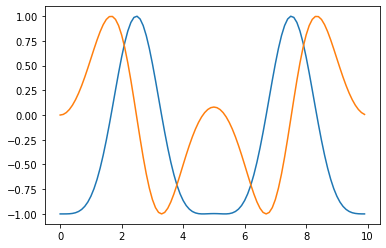

In [33]:
plt.plot(t, a_para)
plt.plot(t, a_perp)

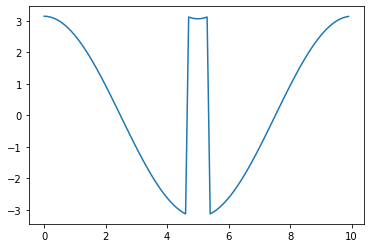

In [34]:
plt.plot(t, gamma)